In [1]:
import tensorflow as tf
import os




In [2]:

# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)

# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
# import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mapimg
matplotlib.__version__

'3.3.2'

In [5]:
import numpy


In [6]:
DIRECTORY =r"E:\MasknoMask\dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [7]:
data= []
labels =[]

In [8]:
os.listdir(DIRECTORY)

['without_mask', 'with_mask']

In [9]:
mask_dir=os.path.join("E:\MasknoMask\dataset\with_mask")
nmask_dir=os.path.join("E:\MasknoMask\dataset\without_mask")
print(len(os.listdir(mask_dir)))
print(len(os.listdir(nmask_dir)))

1915
1918


In [10]:
training_data=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    
    validation_split=0.25
    )








train=training_data.flow_from_directory(
        DIRECTORY,
        target_size=(224,224),
        class_mode='binary',
        batch_size=32,
        subset='training'
    
        )


val=training_data.flow_from_directory(
        DIRECTORY,
        target_size=(224,224),
        class_mode='binary',
        batch_size=32,
        subset='validation'
        )
    


Found 2876 images belonging to 2 classes.
Found 957 images belonging to 2 classes.


In [11]:
model=tf.keras.models.Sequential([

        
        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(224,224,3)),
        tf.keras.layers.MaxPooling2D(2,2),
    
        
        
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
#     
    
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1,activation='sigmoid')
 
    
])

In [12]:
# from tensorflow.keras.optimizers import RMSprop
lr=1e-4
ep=15

opt=tf.keras.optimizers.Adam(learning_rate=lr)

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 128)     73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 26, 26, 128)       0

In [14]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [15]:
filepath = 'tf1_mnisT.hd'

checkpoint = ModelCheckpoint('modelmaskdetsoft.model', monitor='val_loss', verbose=1, 
                             save_best_only=True, save_weights_only=False, 
                             mode='auto')

In [16]:
history=model.fit(train,
          epochs=20,
        validation_data = val,
        steps_per_epoch=train.samples//32,
        validation_steps=val.samples//32,
        callbacks=[checkpoint]
                  
        
        )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 89 steps, validate for 29 steps
Epoch 1/20
33/89 [==========>...................] - ETA: 1:56 - loss: 0.6576 - accuracy: 0.6435

C:\Users\venka\ANACONDA\envs\tf\lib\site-packages\PIL\Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


88/89 [============================>.] - ETA: 1s - loss: 0.4706 - accuracy: 0.7763
Epoch 00001: val_loss improved from inf to 0.28126, saving model to modelmaskdetsoft.model
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: modelmaskdetsoft.model\assets
89/89 [==============================] - 189s 2s/step - loss: 0.4677 - accuracy: 0.7778 - val_loss: 0.2813 - val_accuracy: 0.9246
Epoch 2/20
88/89 [============================>.] - ETA: 1s - loss: 0.2854 - accuracy: 0.9011
Epoch 00002: val_loss improved from 0.28126 to 0.18694, saving model to modelmaskdetsoft.model
INFO:tensorflow:Assets written to: modelmaskdetsoft.model\assets
89/89 [==============================] - 131s 1s/step - loss: 0.2842 - accuracy: 0.9015 - val_loss: 0.1869 - val_accuracy: 0.9397
Epoch 3/20
88/89 [============================>.] - ETA: 1s - loss: 0.2351 - accuracy: 0.9132
Epoch 00003: val_loss improved from 0.18694 to 0.15594, saving model to 

# Plotting Accuracy and Loss

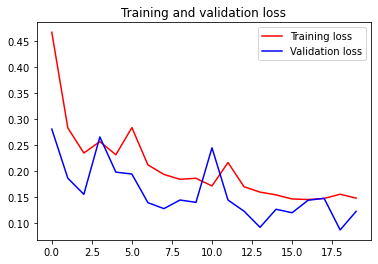

<Figure size 432x288 with 0 Axes>

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [43]:
model=tf.keras.models.load_model('modelmaskdetsoft.model')


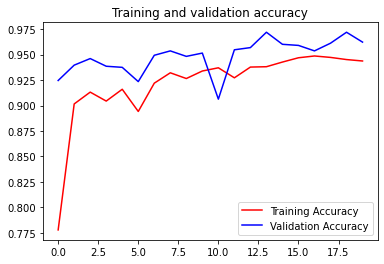

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [44]:
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)

labels_dict={0:'MASK',1:'NO MASK'}
color_dict={1:(0,255,0),0:(0,0,255)}

In [46]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for (x,y,w,h) in faces:
    
        face_img=img[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(224,224))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,224,224,3))
        result=model.predict(reshaped)


      
        if not result:
            print("MASK")
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(img, " Mask", (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

                
            
        else:
            print(" NO Mask")
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(img, " NO Mask", (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)
            
            
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()



# Mask Pic


In [22]:
import cv2
import numpy as np

In [24]:
# path='0_0_≈˙◊¢ 2020-02-24 205216.png'
# path='0_0_0 copy 3.png'
# path='maskdettest1.jpg'
# path='0_0_aidai_0014.jpg'
path='color.jpg'
# path='pexels-photo-614810.jpeg'

# img = image.load_img(path, target_size=(224,224))
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.0


x = image.img_to_array(img)
# x=x/255.
x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
classes = model.predict(x)
classes=np.round(classes)

print(classes)
# print(x.shape)

[[0.]]


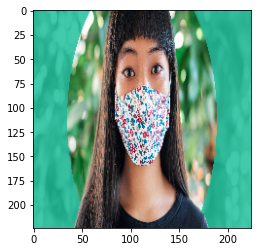

In [27]:
#  im=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

# No Mask

In [29]:
# path='0_0_≈˙◊¢ 2020-02-24 205216.png'
# path='0_0_0 copy 3.png'
# path='maskdettest1.jpg'
path='0_0_aidai_0014.jpg'
# path='color.jpg'
# path='pexels-photo-614810.jpeg'

# img = image.load_img(path, target_size=(224,224))
img=cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
img=img/255.0


x = image.img_to_array(img)
# x=x/255.
x = np.expand_dims(x, axis=0)

# images = np.vstack([x])
classes = model.predict(x)
classes=np.round(classes)

print(classes)
# print(x.shape)

[[1.]]


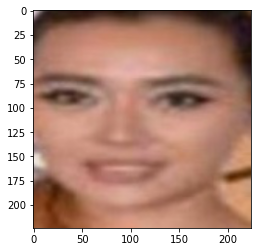

In [31]:
#  im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(img)